In [7]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [65]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.models import load_model

In [ ]:
tesla = yf.download('TSLA', start='2015-01-01', end='2024-12-31')

tesla.to_csv("/Users/ivyadiele/Desktop/PythonProject/TimeSeriesForecasting/tesla_stock.csv")

print("Tesla stock data downloaded and saved to tesla_stock,.csv")

In [69]:
df = pd.read_csv("/Users/ivyadiele/Desktop/PythonProject/TimeSeriesForecasting/tesla_stock.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
02/01/2015,14.620667,14.883333,14.217333,14.858000,71466000
05/01/2015,14.006000,14.433333,13.810667,14.303333,80527500
06/01/2015,14.085333,14.280000,13.614000,14.004000,93928500
07/01/2015,14.063333,14.318667,13.985333,14.223333,44526000
08/01/2015,14.041333,14.253333,14.000667,14.187333,51637500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 02/01/2015 to 30/12/2024
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2515 non-null   float64
 1   High    2515 non-null   float64
 2   Low     2515 non-null   float64
 3   Open    2515 non-null   float64
 4   Volume  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9+ KB


In [15]:
df.describe()

,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,115.564847,118.127021,112.871415,115.578935,1.123238e+08
std,114.104456,116.747743,111.357651,114.169550,7.408058e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.185000,17.480000,16.888333,17.174334,6.681690e+07
50%,28.502001,28.713333,27.333332,28.299999,9.286200e+07
75%,220.178337,225.253334,215.294998,220.825005,1.298032e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [17]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

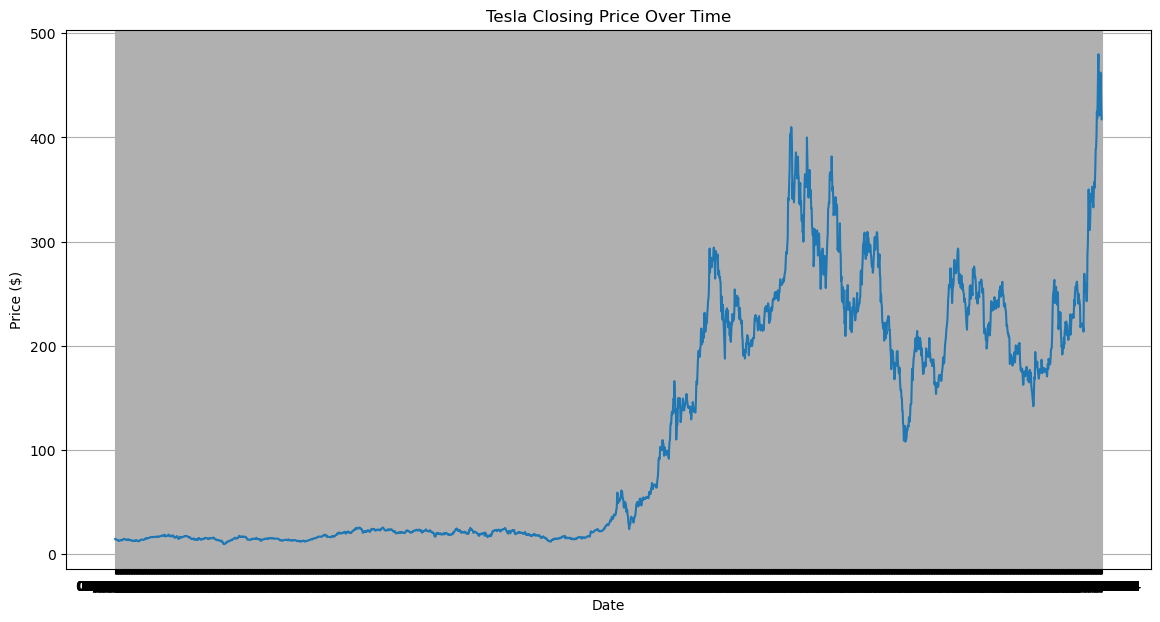

In [19]:
plt.figure(figsize=(14,7))
plt.plot(df["Close"], label= "Tesla Close Price")
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend
plt.grid(True)
plt.show()

In [21]:
ts = df["Close"]

In [23]:
result = adfuller(ts)
print ("ADF Statistic:", result[0])
print ("p_value:", result[1])

ADF Statistic: -0.48483117413825666
p_value: 0.8949427543743785


In [25]:
ts_diff = ts.diff().dropna()

In [70]:
result_diff = adfuller(ts_diff)
print("ADF Statistic (after diff):", result_diff[0])
print("p-value:", result_diff[1])

ADF Statistic (after diff): -9.648486279352177
p-value: 1.456059797593611e-16


In [27]:
ts_diff2 = ts_diff.diff().dropna()

In [29]:
result_diff2 = adfuller(ts_diff2)
print("ADF Statistic (2nd-order):", result_diff2[0])
print("p-value (2nd-order):", result_diff2[1])

ADF Statistic (2nd-order): -15.278570108581699
p-value (2nd-order): 4.611441575164154e-28


In [31]:
result_diff2 = adfuller(ts_diff2)
print("ADF Statistic (2nd-order):", result_diff2[0])
print("p-value (2nd-order):", result_diff2[1])

ADF Statistic (2nd-order): -15.278570108581699
p-value (2nd-order): 4.611441575164154e-28


In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

In [39]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]

In [45]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)

In [47]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [49]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.8737e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0012
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.3953e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.1

In [53]:
test_data = scaled_data[train_size - 60:] 
X_test, y_test = create_sequences(test_data, seq_length)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [55]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


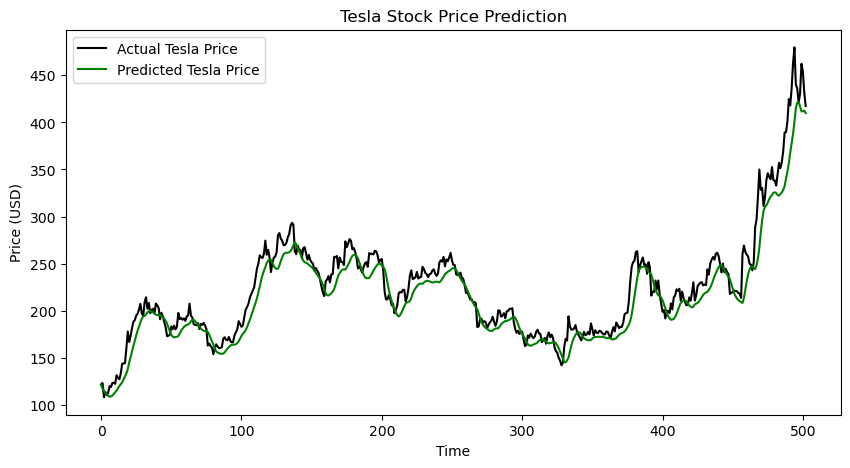

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, color='black', label='Actual Tesla Price')
plt.plot(predictions, color='green', label='Predicted Tesla Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [61]:
mse = mean_squared_error(actual_prices, predictions)
mae = mean_absolute_error(actual_prices, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Mean Squared Error: 327.9836
Mean Absolute Error: 13.2737


In [71]:
model.save("/Users/ivyadiele/Desktop/PythonProject/TimeSeriesForecasting/lstm_stock_model.h5")
print("Model saved as lstm_stock_model.h5")

Model saved as lstm_stock_model.h5


In [73]:
model = load_model("/Users/ivyadiele/Desktop/PythonProject/TimeSeriesForecasting/lstm_stock_model.h5")